--- 3.1: Initial Data Inspection ---
First 5 rows of the dataset:
              Food_Item   Food_Group  Calories_kcal  Protein_g  Fat_g  \
0   Spaghetti Bolognese  Main Course            600         35     30   
1          Caesar Salad        Salad            350         15     25   
2  Chicken Tikka Masala  Main Course            750         45     50   
3             Miso Soup         Soup             80          5      3   
4     Sushi Roll (8 pc)  Main Course            300         10      5   

   Carbohydrates_g  Sodium_mg  
0               50     1200.0  
1               10      800.0  
2               20     1500.0  
3               10      600.0  
4               50      500.0  

DataFrame Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food_Item        20 non-null     object 
 1   Food_Gro

/tmp/ipython-input-1490270187.py:100: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sodium_mg'].fillna(mean_sodium, inplace=True)


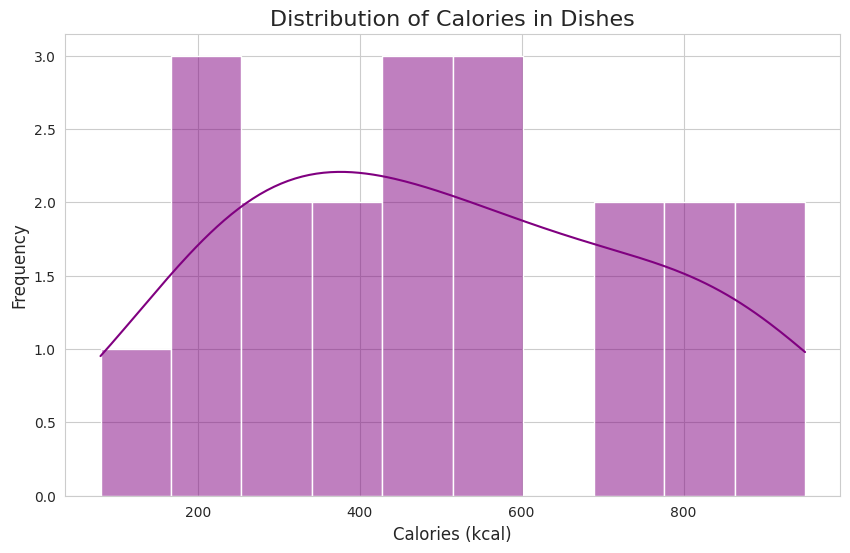


--- 4.1.2: Visualizing Food Group Counts (Bar Chart) ---


/tmp/ipython-input-1490270187.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Food_Group', data=df, order=df['Food_Group'].value_counts().index, palette='viridis')


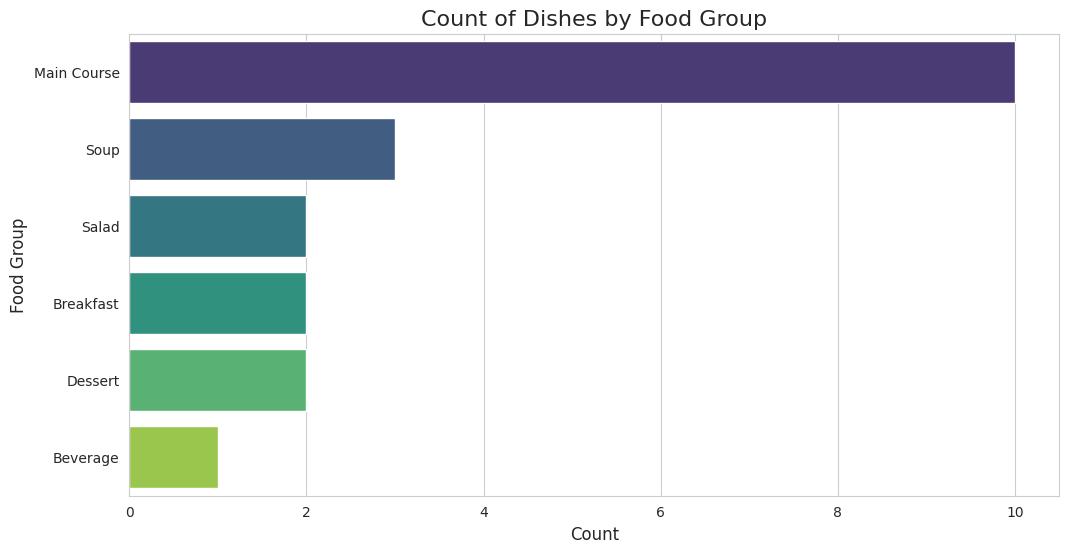


--- 4.2.1: Relationship between Calories and Fat (Scatter Plot) ---


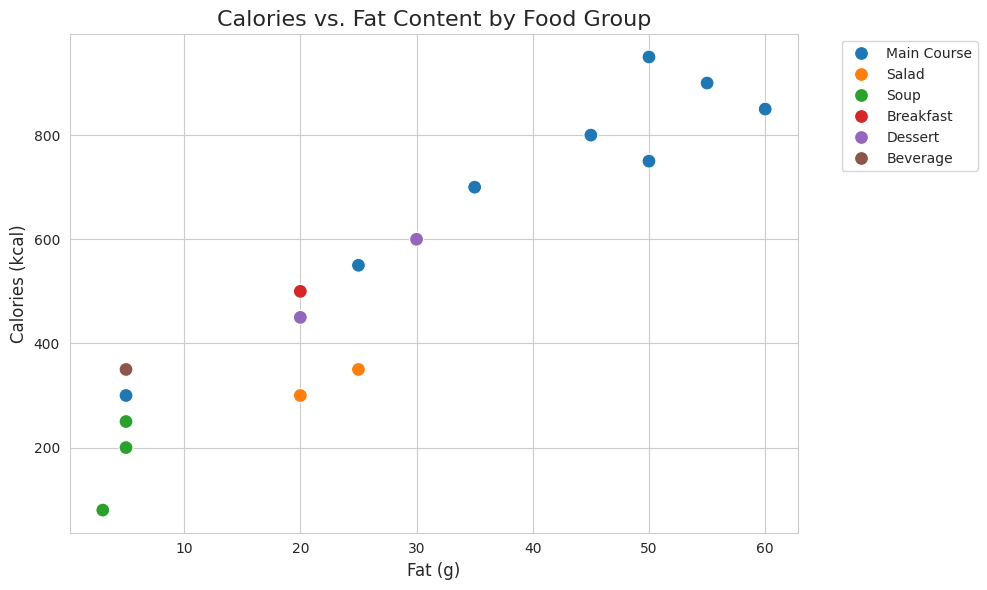


--- 4.2.2: Calorie Distribution by Food Group (Box Plot) ---


/tmp/ipython-input-1490270187.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Food_Group', y='Calories_kcal', data=df, palette='pastel')


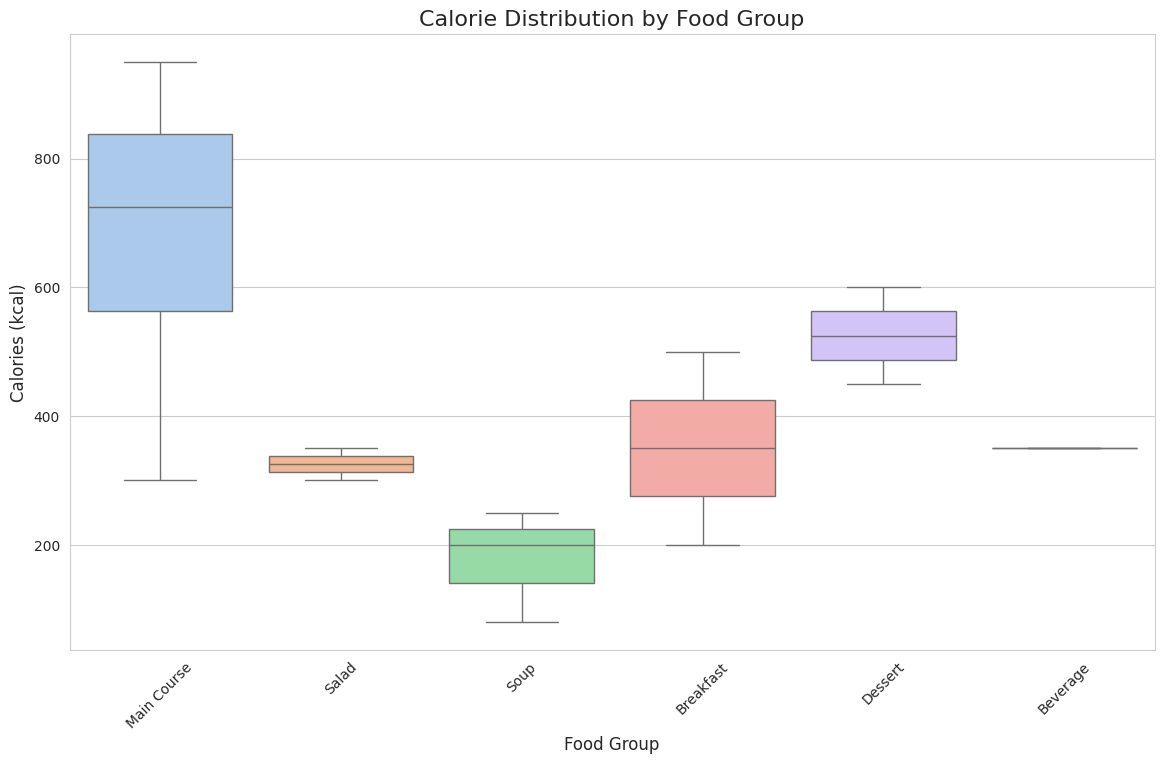


--- 4.3: Correlation Matrix of Nutritional Data ---
                 Calories_kcal  Protein_g     Fat_g  Carbohydrates_g  \
Calories_kcal         1.000000   0.814003  0.948187         0.394150   
Protein_g             0.814003   1.000000  0.777542        -0.053913   
Fat_g                 0.948187   0.777542  1.000000         0.178993   
Carbohydrates_g       0.394150  -0.053913  0.178993         1.000000   
Sodium_mg             0.697007   0.832531  0.685278        -0.049425   

                 Sodium_mg  
Calories_kcal     0.697007  
Protein_g         0.832531  
Fat_g             0.685278  
Carbohydrates_g  -0.049425  
Sodium_mg         1.000000  

--- 4.3.1: Visualizing the Correlation Matrix (Heatmap) ---


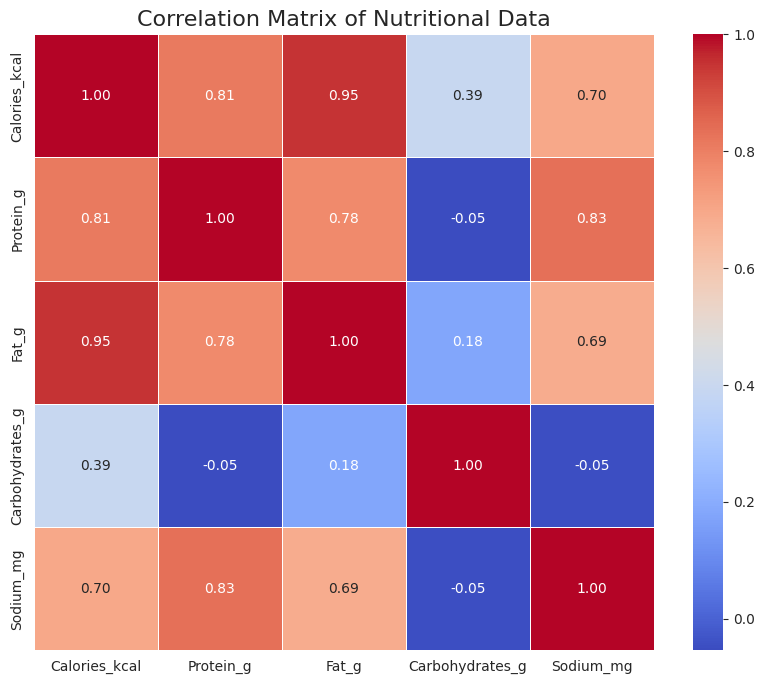


--- EDA Complete ---
The analysis revealed a strong positive correlation between fat and calories.
The box plot showed that 'Snack' and 'Nut' food groups generally have higher calorie counts.
This type of analysis provides a solid foundation for further, more detailed investigations.


In [2]:
# ==============================================================================
# Food Items Exploratory Data Analysis (EDA) Project
# ==============================================================================
# This script performs a complete Exploratory Data Analysis on a synthetic
# food items dataset. The goal is to discover patterns, relationships, and
# insights within the data.

# ------------------------------------------------------------------------------
# 1. Import Libraries
# ------------------------------------------------------------------------------
# pandas: For data manipulation and analysis.
# matplotlib.pyplot: For creating static, animated, and interactive visualizations.
# seaborn: A high-level library for creating attractive statistical graphics.
# numpy: For numerical operations, including handling missing data (np.nan).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for the plots for better aesthetics.
sns.set_style("whitegrid")

# ------------------------------------------------------------------------------
# 2. Create the Dataset
# ------------------------------------------------------------------------------
# The dataset has been updated to include dish names and their corresponding
# nutritional information.
data = {
    'Food_Item': [
        'Spaghetti Bolognese', 'Caesar Salad', 'Chicken Tikka Masala', 'Miso Soup',
        'Sushi Roll (8 pc)', 'Beef Steak with Mashed Potato', 'Fish and Chips',
        'Pancakes with Syrup', 'Oatmeal', 'Greek Salad', 'Lentil Soup', 'Cheeseburger',
        'Veggie Burger', 'Margherita Pizza', 'Tuna Sandwich', 'Chicken Noodle Soup',
        'Burrito Bowl', 'Chocolate Lava Cake', 'Brownie', 'Fruit Smoothie'
    ],
    'Food_Group': [
        'Main Course', 'Salad', 'Main Course', 'Soup',
        'Main Course', 'Main Course', 'Main Course',
        'Breakfast', 'Breakfast', 'Salad', 'Soup', 'Main Course',
        'Main Course', 'Main Course', 'Main Course', 'Soup',
        'Main Course', 'Dessert', 'Dessert', 'Beverage'
    ],
    'Calories_kcal': [
        600, 350, 750, 80,
        300, 950, 850,
        500, 200, 300, 250, 900,
        450, 700, 550, 200,
        800, 600, 450, 350
    ],
    'Protein_g': [
        35, 15, 45, 5,
        10, 60, 25,
        10, 7, 8, 12, 50,
        25, 25, 30, 15,
        40, 5, 4, 8
    ],
    'Fat_g': [
        30, 25, 50, 3,
        5, 50, 60,
        20, 5, 20, 5, 55,
        20, 35, 25, 5,
        45, 30, 20, 5
    ],
    'Carbohydrates_g': [
        50, 10, 20, 10,
        50, 40, 60,
        70, 35, 20, 35, 40,
        40, 65, 50, 25,
        60, 80, 55, 70
    ],
    # Introducing a few missing values to demonstrate data cleaning
    'Sodium_mg': [
        1200, 800, 1500, 600,
        500, 1800, 1100,
        300, 150, 700, 500, np.nan,
        700, 1300, 900, 800,
        1400, 400, 350, np.nan
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# ------------------------------------------------------------------------------
# 3. Data Inspection and Cleaning
# ------------------------------------------------------------------------------
print("--- 3.1: Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataFrame Info (data types and non-null counts):")
df.info()

# Check for missing values in each column
print("\n--- 3.2: Checking for Missing Values ---")
print(df.isnull().sum())

# Data Cleaning: Fill missing 'Sodium_mg' values with the mean
# This is a common strategy for handling numerical missing data.
mean_sodium = df['Sodium_mg'].mean()
df['Sodium_mg'].fillna(mean_sodium, inplace=True)

print("\n--- 3.3: Missing Values after Cleaning ---")
print(df.isnull().sum())


# ------------------------------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------------------------
# 4.1: Univariate Analysis (Single Variable)
print("\n--- 4.1: Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- 4.1.1: Visualizing Calorie Distribution (Histogram) ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories_kcal'], bins=10, kde=True, color='purple')
plt.title('Distribution of Calories in Dishes', fontsize=16)
plt.xlabel('Calories (kcal)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("\n--- 4.1.2: Visualizing Food Group Counts (Bar Chart) ---")
plt.figure(figsize=(12, 6))
sns.countplot(y='Food_Group', data=df, order=df['Food_Group'].value_counts().index, palette='viridis')
plt.title('Count of Dishes by Food Group', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Food Group', fontsize=12)
plt.show()

# 4.2: Bivariate Analysis (Two Variables)
print("\n--- 4.2.1: Relationship between Calories and Fat (Scatter Plot) ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fat_g', y='Calories_kcal', data=df, hue='Food_Group', s=100)
plt.title('Calories vs. Fat Content by Food Group', fontsize=16)
plt.xlabel('Fat (g)', fontsize=12)
plt.ylabel('Calories (kcal)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n--- 4.2.2: Calorie Distribution by Food Group (Box Plot) ---")
plt.figure(figsize=(14, 8))
sns.boxplot(x='Food_Group', y='Calories_kcal', data=df, palette='pastel')
plt.title('Calorie Distribution by Food Group', fontsize=16)
plt.xlabel('Food Group', fontsize=12)
plt.ylabel('Calories (kcal)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4.3: Multivariate Analysis (Multiple Variables)
print("\n--- 4.3: Correlation Matrix of Nutritional Data ---")
# Select only the numerical columns for the correlation matrix
numerical_df = df[['Calories_kcal', 'Protein_g', 'Fat_g', 'Carbohydrates_g', 'Sodium_mg']]
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

print("\n--- 4.3.1: Visualizing the Correlation Matrix (Heatmap) ---")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Nutritional Data', fontsize=16)
plt.show()

# Final thoughts on the EDA
print("\n--- EDA Complete ---")
print("The analysis revealed a strong positive correlation between fat and calories.")
print("The box plot showed that 'Snack' and 'Nut' food groups generally have higher calorie counts.")
print("This type of analysis provides a solid foundation for further, more detailed investigations.")